# Project Setup

In [1]:
### Import Libraries and Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Data Loading & Exploration

In [2]:
# Data loading and initial exploration

# Load dataset
df = pd.read_csv('data/coupons.csv')
print("data overview")
print(f"dataset shape: {df.shape}")
print(f"total records: {df.shape[0]}")
print(f"total features: {df.shape[1]}")

# Display columns
print(f"{df.columns}")

print("column names and data types:")
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    print(f"{i:2}. {col:<25} ({dtype})")

# Sample data
display(df.head())

data overview
dataset shape: (12684, 26)
total records: 12684
total features: 26
Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')
column names and data types:
 1. destination               (object)
 2. passanger                 (object)
 3. weather                   (object)
 4. temperature               (int64)
 5. time                      (object)
 6. coupon                    (object)
 7. expiration                (object)
 8. gender                    (object)
 9. age                       (object)
10. maritalStatus             (object)
11. has_children              (int64)
12. education                 (object

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# Check & Fix Missing Values + Explore Data Frame Basic Stats

In [3]:
# Missing Values & Stats

# check for missing values
missing_values = df.isnull().sum()

if missing_values.sum() > 0:
    missing_df = pd.DataFrame({
        'Column': missing_values.index,
        'Missing_Count': missing_values.values,
    })
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
    print("Columns with missing values:")
    display(missing_df)
else:
    print("No missing values")

# Stats for numerical columns
print(f"Column Stats")
# Return a dataframe containing only numerical columns and extract just the column name
numerical_cols = df.select_dtypes(include=[np.number]).columns
# Create a subset dataframe
display(df[numerical_cols].describe())

Columns with missing values:


,Column,Missing_Count
14,car,12576
16,CoffeeHouse,217
19,Restaurant20To50,189
17,CarryAway,151
18,RestaurantLessThan20,130
15,Bar,107


Column Stats


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


# Target Variable Analysis – Coupon Acceptance Variable

In [4]:
# Target Variable Analysis

# Analyze the Coupon Acceptance variable
target_counts = df['Y'].value_counts().sort_index()
# Convert counts to percentages
target_rates = df['Y'].value_counts(normalize=True).sort_index()

print("Coupon Acceptance Distribution:")
print(f"Rejected: {target_counts[0]:,} customers ({target_rates[0]:.1%} of people rejected)")
print(f"Accepted: {target_counts[1]:,} customers ({target_rates[1]:.1%} of people accepted)")
overall_acceptance_rate = df['Y'].mean()
print(f"\nOverall Acceptance Rate: {overall_acceptance_rate:.1%}")

Coupon Acceptance Distribution:
Rejected: 5,474 customers (43.2% of people rejected)
Accepted: 7,210 customers (56.8% of people accepted)

Overall Acceptance Rate: 56.8%


# Visualize Coupon Acceptance Variable (Basic – One Variable)

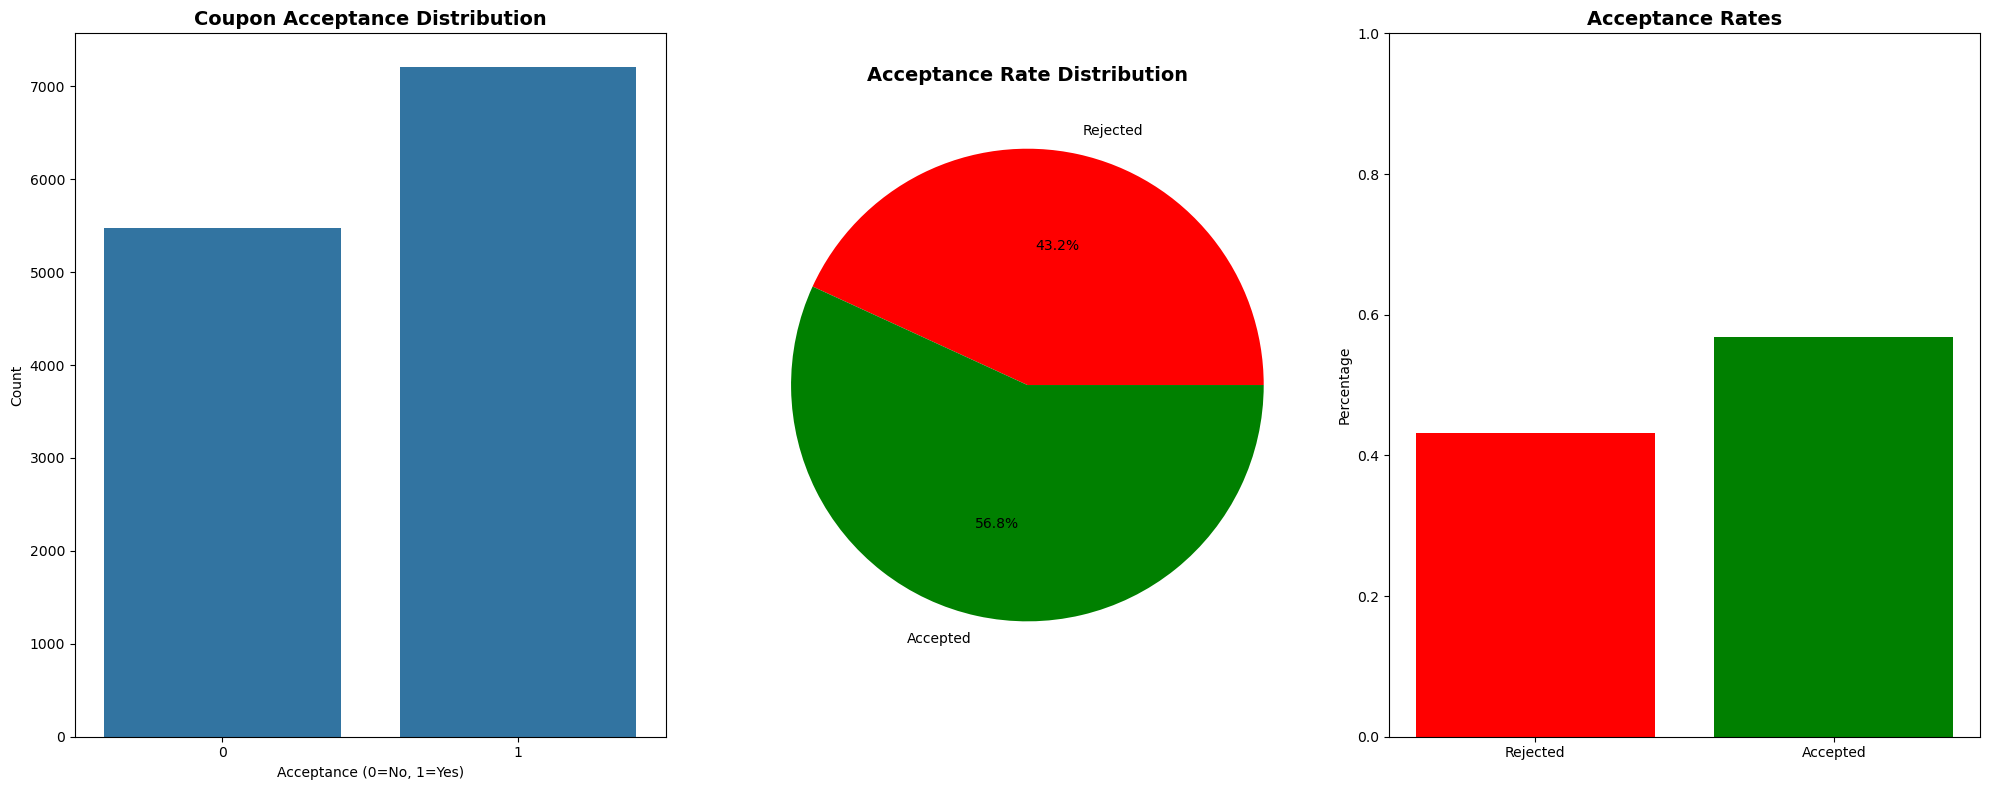

In [25]:
# Visualize Coupon Acceptance Variable

# Create a figure wih 3 subplots arranged in 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Count plot generation
sns.countplot(data=df, x='Y', ax=axes[0])
# Creates a bar chart showing raw counts of 0s and 1s in the 'Y' column
axes[0].set_title('Coupon Acceptance Distribution', fontsize=14, fontweight='bold')
# Adds title, x-label, and y-label
axes[0].set_xlabel('Acceptance (0=No, 1=Yes)')
axes[0].set_ylabel('Count')

# Pie chart generation
axes[1].pie(target_counts.values, labels=['Rejected', 'Accepted'], 
           autopct='%1.1f%%', colors=['red', 'green'])
axes[1].set_title('Acceptance Rate Distribution', fontsize=14, fontweight='bold')

# Bar chart with percentages
bars = axes[2].bar(['Rejected', 'Accepted'], target_rates.values, color=['red', 'green'])
axes[2].set_title('Acceptance Rates', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Percentage')
# Sets y-axis limits from 0 to 1 (0% to 100%)
axes[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Coupon Analysis

Coupon Performance Summary:


,Total_Offers,Total_Accepted,Acceptance_Rate,Rejection_Rate
coupon,,,,
Carry out & Take away,2393,1760,0.74,0.26
Restaurant(<20),2786,1970,0.71,0.29
Coffee House,3996,1995,0.50,0.50
Restaurant(20-50),1492,658,0.44,0.56
Bar,2017,827,0.41,0.59


Best Performing: Carry out & Take away (74.0%)
Worst Performing: Bar (41.0%)


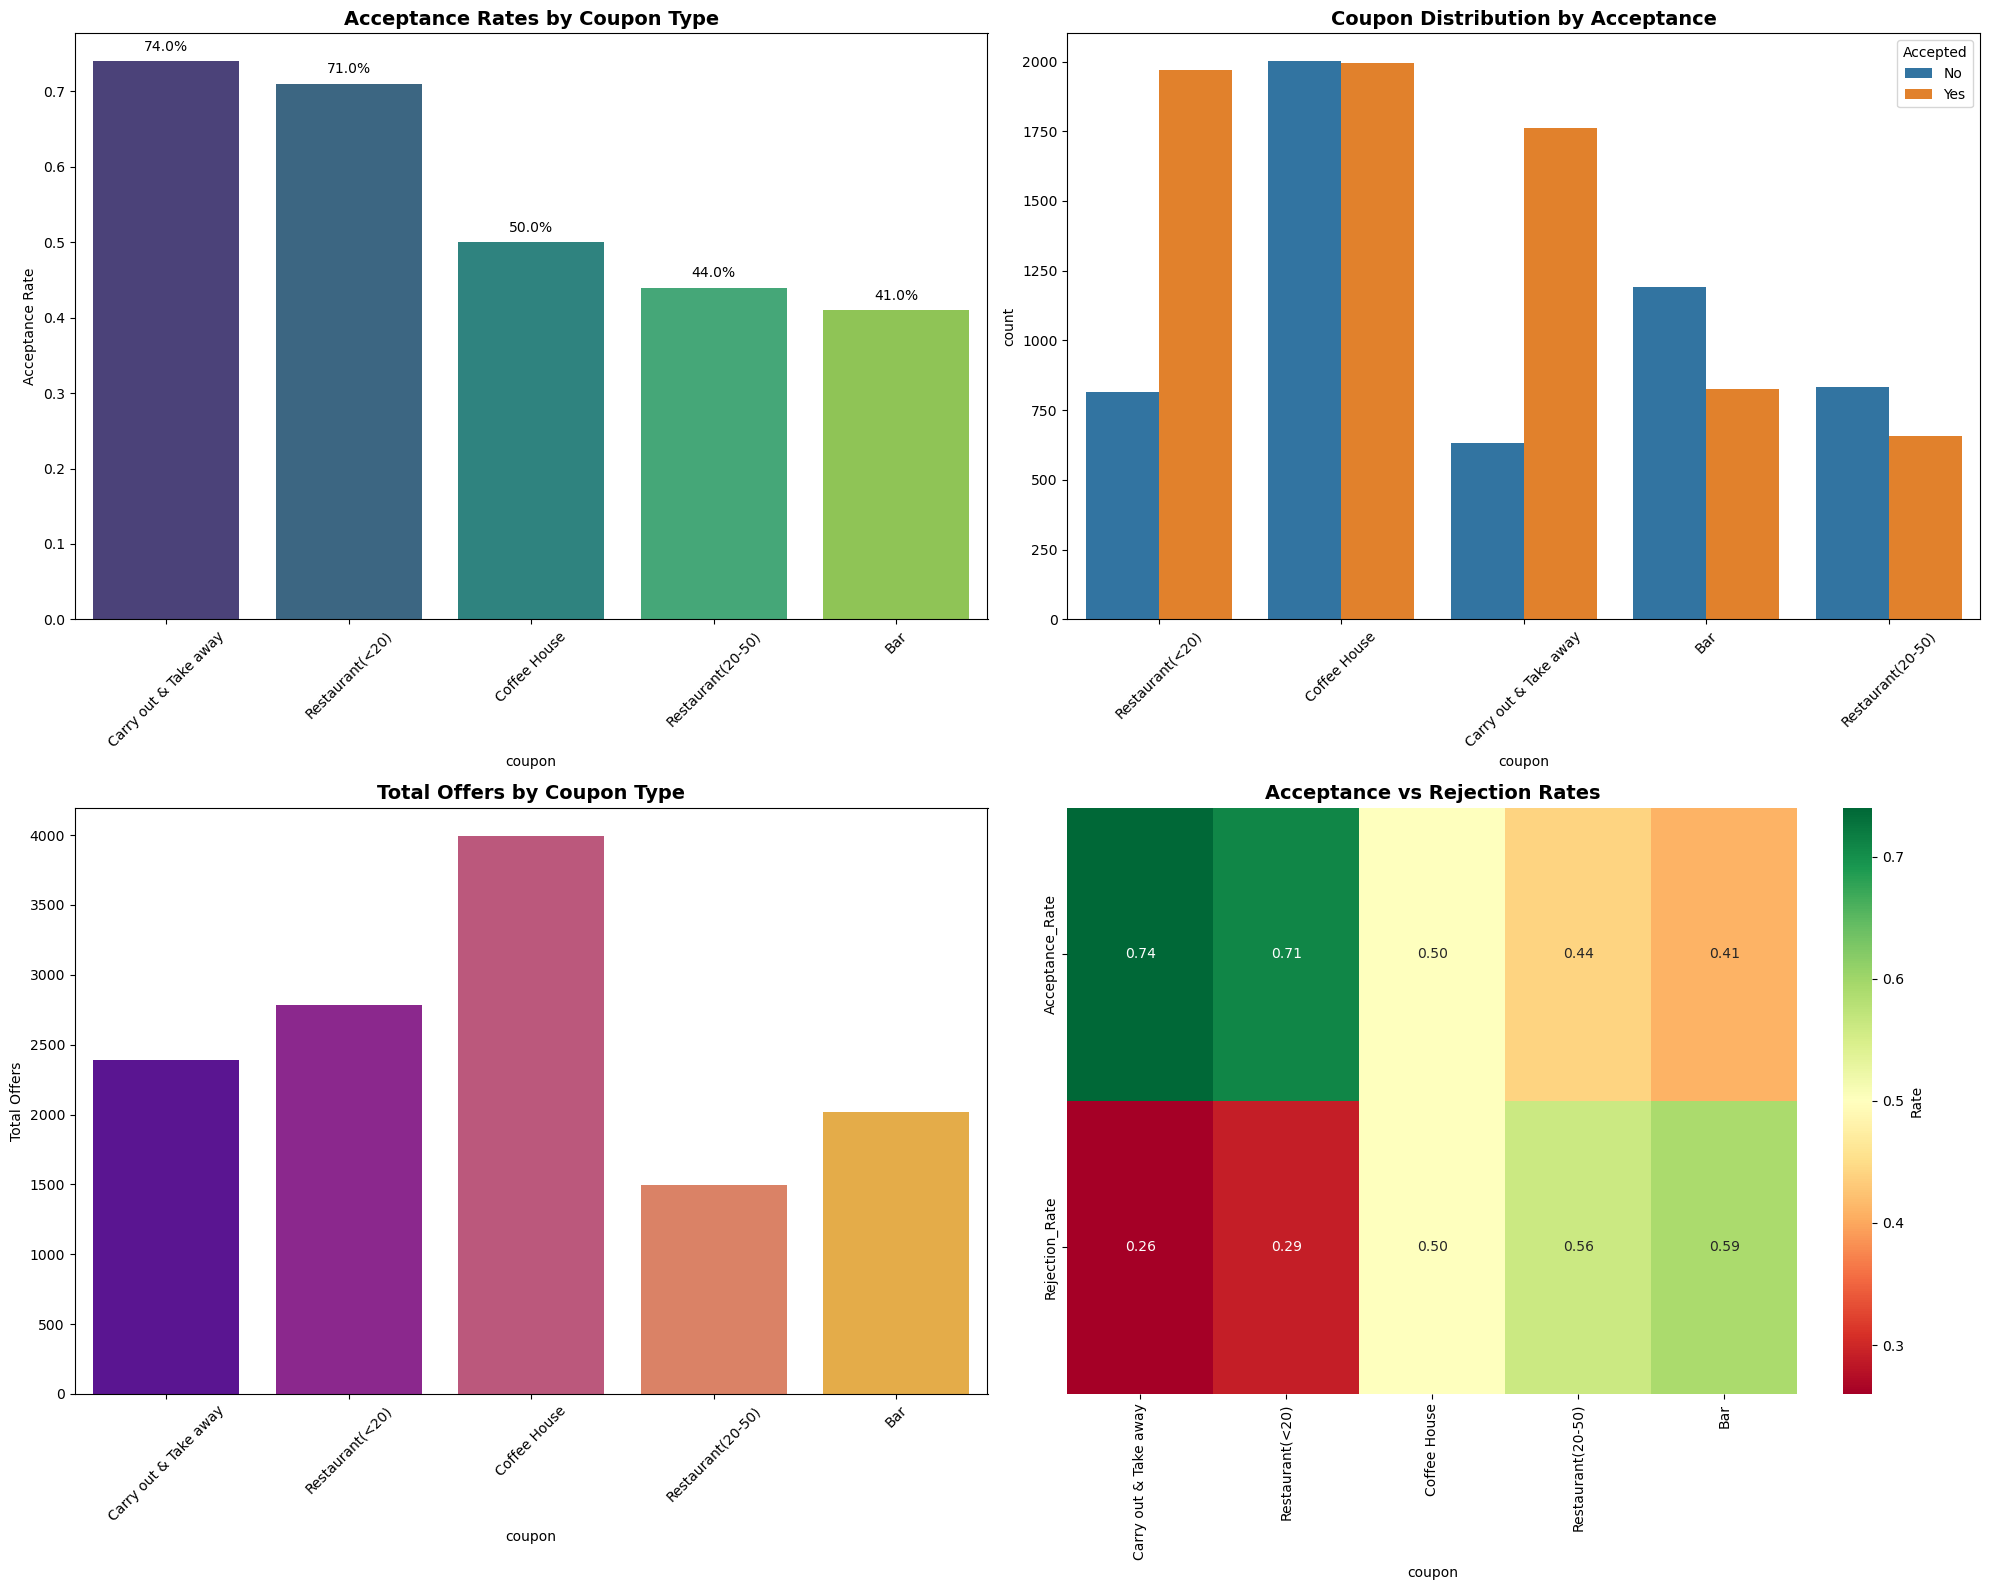

In [63]:
# Coupon Analysis

# Analyze acceptance by coupon type
# Groups the dataframe by coupon types
# .Agg will calculate 3 stats on the 'Y' column
coupon_stats = df.groupby('coupon').agg({
    'Y': ['count', 'sum', 'mean']
}).round(2)

# Rename columns
coupon_stats.columns = ['Total_Offers', 'Total_Accepted', 'Acceptance_Rate']

# Sort
coupon_stats = coupon_stats.sort_values('Acceptance_Rate', ascending=False)

# Calculate rejection rate
coupon_stats['Rejection_Rate'] = 1 - coupon_stats['Acceptance_Rate']

print("Coupon Performance Summary:")
display(coupon_stats)

# Find the best and worst performing coupons
best_coupon = coupon_stats.index[0]
worst_coupon = coupon_stats.index[-1]
performance_gap = coupon_stats.iloc[0]['Acceptance_Rate'] - coupon_stats.iloc[-1]['Acceptance_Rate']

print(f"Best Performing: {best_coupon} ({coupon_stats.iloc[0]['Acceptance_Rate']:.1%})")
print(f"Worst Performing: {worst_coupon} ({coupon_stats.iloc[-1]['Acceptance_Rate']:.1%})")

# Visualize coupon performance

# Setup the canvase
fig, axes = plt.subplots(2, 2, figsize=(20,16))

# Acceptance rates by coupon type

# Converts the index (coupon names) back to a regular column
# coupon_stats_reset = coupon_stats.reset_index()

sns.barplot(data=coupon_stats, x='coupon', y='Acceptance_Rate', 
           palette='viridis', ax=axes[0,0])
axes[0,0].set_title('Acceptance Rates by Coupon Type', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Acceptance Rate')
axes[0,0].tick_params(axis='x', rotation=45)
for i, v in enumerate(coupon_stats['Acceptance_Rate']):
    axes[0,0].text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom')

# Count plot with acceptance
sns.countplot(data=df, x='coupon', hue='Y', ax=axes[0,1])
axes[0,1].set_title('Coupon Distribution by Acceptance', fontsize=14, fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(title='Accepted', labels=['No', 'Yes'])

# Total offers comparison
sns.barplot(data=coupon_stats, x='coupon', y='Total_Offers', 
           palette='plasma', ax=axes[1,0])
axes[1,0].set_title('Total Offers by Coupon Type', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Total Offers')
axes[1,0].tick_params(axis='x', rotation=45)

# Acceptance vs Rejection rates heatmap
# Prepare data for heatmap. Transpose so that columns and rows are flipped.
rates_for_heatmap = coupon_stats[['Acceptance_Rate', 'Rejection_Rate']].T
sns.heatmap(rates_for_heatmap, annot=True, fmt='.2f', cmap='RdYlGn', 
           cbar_kws={'label': 'Rate'}, ax=axes[1,1])
axes[1,1].set_title('Acceptance vs Rejection Rates', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Demographic Analysis

In [122]:
# Display columns

# Is there a correlation with the type of person and the coupon that was served to them?
# Look at Passenger, gender, age, marital status, has children, occupation, education, income
# print(f"{df.columns}")

# Analyze categorical variables – 'destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'car', 
def analyze_demographic(column_name):
    # Analyze acceptance rates by demographic category. count is number of people in category, sum is number who accepted, mean is acceptance rate
    analysis = df.groupby(column_name)['Y'].agg(['count', 'sum', 'mean']).round(2)
    # Rename columns
    analysis.columns = ['Total', 'Accepted', 'Acceptance_Rate']
    # Sort results
    analysis = analysis.sort_values('Acceptance_Rate', ascending=False)
    return analysis

# define demographics to analyze
demographics = ['age', 'gender', 'maritalStatus', 'education', 'occupation', 'income', 'has_children']

# create an empty dictionary to store results
demographic_results = {}

# loops through each demographic
for demographic in demographics:
    print(f"\n {demographic} analysis:")
    # call function
    result = analyze_demographic(demographic)
    # save result in dictionary
    demographic_results[demographic] = result
    display(result)

# For each demographic – a table showing total people, number who accepted coupons and acceptance rate (sorted from highest to lowest acceptance rate)


 age analysis:


,Total,Accepted,Acceptance_Rate
age,,,
below21,547,347,0.63
21,2653,1587,0.60
26,2559,1525,0.60
46,686,395,0.58
41,1093,626,0.57
31,2039,1114,0.55
36,1319,706,0.54
50plus,1788,910,0.51



 gender analysis:


,Total,Accepted,Acceptance_Rate
gender,,,
Male,6173,3647,0.59
Female,6511,3563,0.55



 maritalStatus analysis:


,Total,Accepted,Acceptance_Rate
maritalStatus,,,
Single,4752,2879,0.61
Unmarried partner,2186,1227,0.56
Married partner,5100,2769,0.54
Divorced,516,273,0.53
Widowed,130,62,0.48



 education analysis:


,Total,Accepted,Acceptance_Rate
education,,,
Some High School,88,63,0.72
Some college - no degree,4351,2595,0.60
High School Graduate,905,536,0.59
Associates degree,1153,638,0.55
Bachelors degree,4335,2403,0.55
Graduate degree (Masters or Doctorate),1852,975,0.53



 occupation analysis:


,Total,Accepted,Acceptance_Rate
occupation,,,
Healthcare Support,242,169,0.70
Construction & Extraction,154,106,0.69
Healthcare Practitioners & Technical,244,165,0.68
Protective Service,175,113,0.65
Architecture & Engineering,175,111,0.63
Production Occupations,110,68,0.62
Student,1584,967,0.61
Office & Administrative Support,639,384,0.60
Transportation & Material Moving,218,130,0.60



 income analysis:


,Total,Accepted,Acceptance_Rate
income,,,
$50000 - $62499,1659,988,0.60
$25000 - $37499,2013,1194,0.59
Less than $12500,1042,618,0.59
$100000 or More,1736,1004,0.58
$12500 - $24999,1831,1052,0.57
$37500 - $49999,1805,1018,0.56
$62500 - $74999,846,446,0.53
$87500 - $99999,895,476,0.53
$75000 - $87499,857,414,0.48



 has_children analysis:


,Total,Accepted,Acceptance_Rate
has_children,,,
0,7431,4365,0.59
1,5253,2845,0.54


# Visualize demographic factors

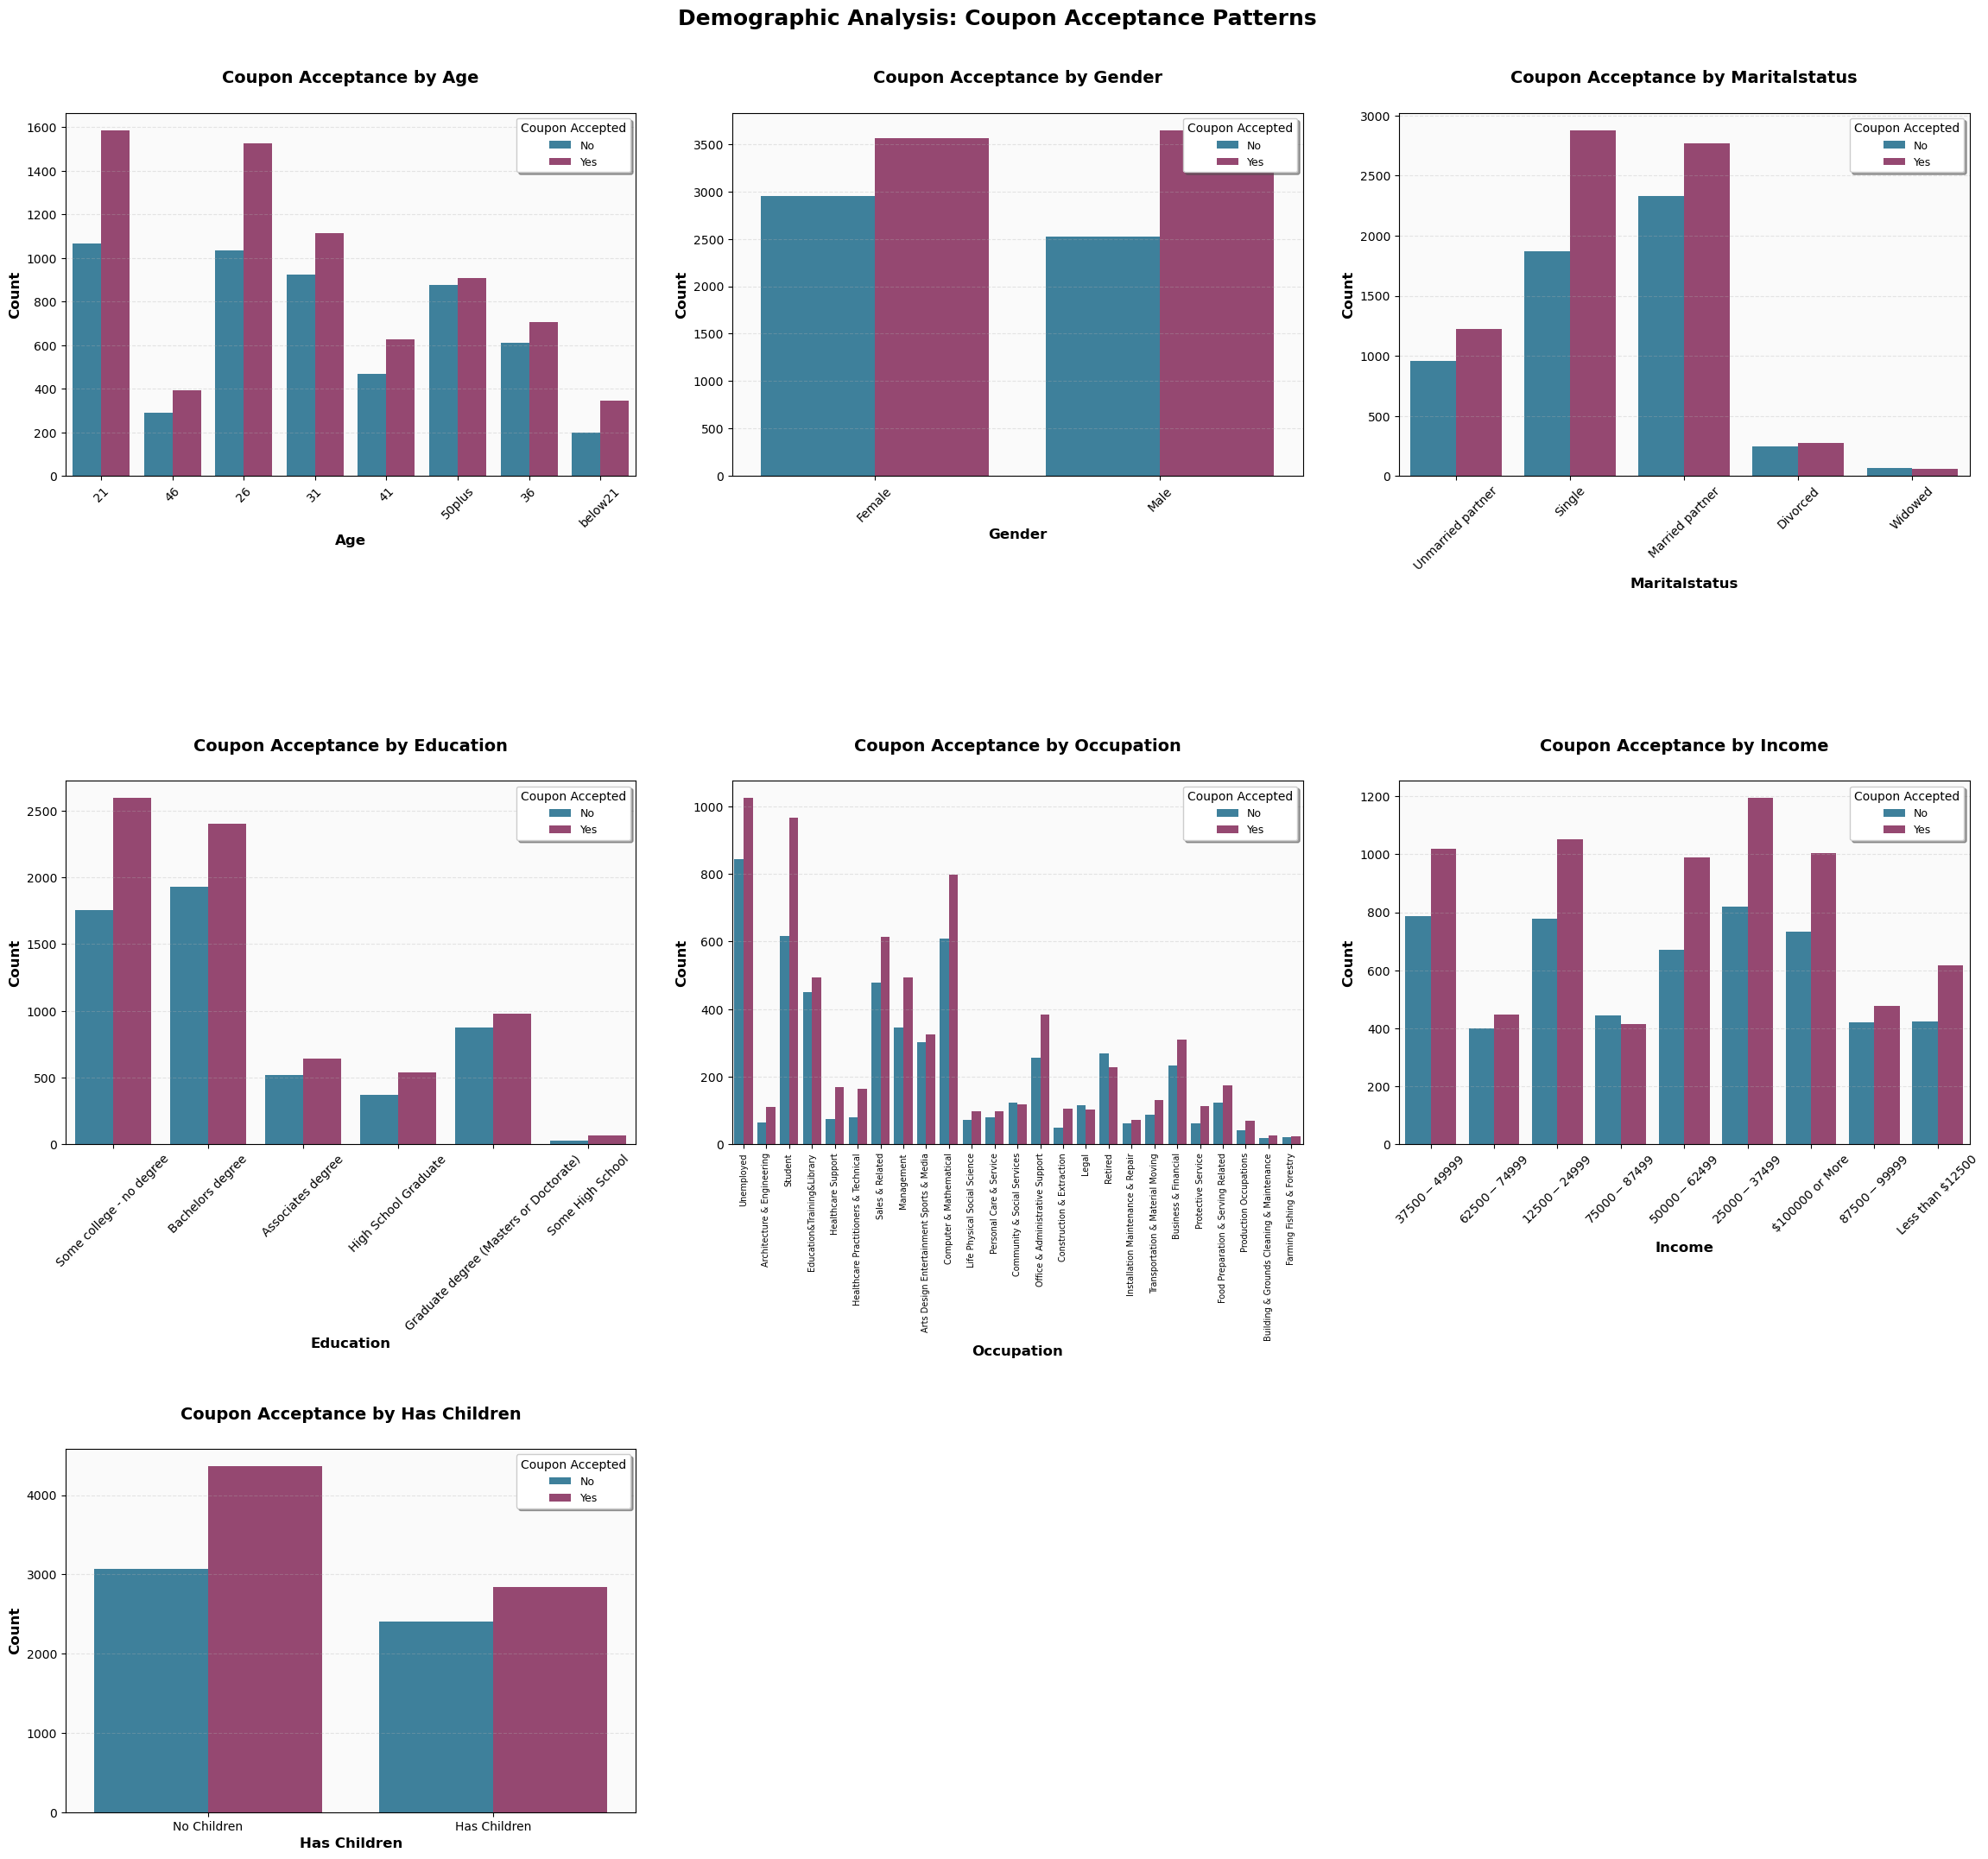

In [145]:
# Visualize demographic factors
fig, axes = plt.subplots(3, 3, figsize=(24, 22))
axes = axes.flatten()

# Set a consistent color palette
colors = ['#2E86AB', '#A23B72']
sns.set_palette(colors)

for i, demo in enumerate(demographics):
    # Create the countplot
    sns.countplot(data=df, x=demo, hue='Y', ax=axes[i])
    
    # Customize each plot
    axes[i].set_title(f'Coupon Acceptance by {demo.replace("_", " ").title()}', 
                     fontsize=14, fontweight='bold', pad=25)
    axes[i].set_xlabel(demo.replace("_", " ").title(), fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=12, fontweight='bold')
    
    # Special handling for different demographics bc overlap
    if demo == 'occupation':
        # Rotate labels to 90 degrees for occupation
        axes[i].tick_params(axis='x', rotation=90, labelsize=8)
        # Reduce font size further for occupation labels
        for label in axes[i].get_xticklabels():
            label.set_fontsize(7)
    elif demo == 'has_children':
        # Fix has_children x-axis labels to be more readable
        axes[i].set_xticklabels(['No Children', 'Has Children'])
        axes[i].tick_params(axis='x', rotation=0, labelsize=10)
    else:
        # Standard 45-degree rotation for other charts
        axes[i].tick_params(axis='x', rotation=45, labelsize=10)
    
    axes[i].tick_params(axis='y', labelsize=10)
    
    # Add legend to every plot
    axes[i].legend(title='Coupon Accepted', labels=['No', 'Yes'], 
                  title_fontsize=10, fontsize=9, loc='upper right',
                  frameon=True, fancybox=True, shadow=True)
    
    # Add subtle grid
    axes[i].grid(axis='y', alpha=0.3, linestyle='--')
    
    # Set background color
    axes[i].set_facecolor('#fafafa')

# Hide the last 2 empty subplots (since only have 7 charts in a 3x3 grid)
for empty in range(7, 9):
    axes[empty].set_visible(False)

# Adjust layout and spacing with extra top margin for title
plt.tight_layout(pad=4, h_pad=5, w_pad=3)
plt.subplots_adjust(top=0.94)  # Add space at top for main title

# Add a main title with higher position to avoid overlap
fig.suptitle('Demographic Analysis: Coupon Acceptance Patterns', 
             fontsize=18, fontweight='bold', y=0.995)

plt.show()

# Contextual Factor Analysis

'weather analysis:'

,Total,Accepted,Acceptance_Rate
weather,,,
Sunny,10069,5989,0.59
Snowy,1405,661,0.47
Rainy,1210,560,0.46


'temperature analysis:'

,Total,Accepted,Acceptance_Rate
temperature,,,
80,6528,3919,0.60
55,3840,2061,0.54
30,2316,1230,0.53


'time analysis:'

,Total,Accepted,Acceptance_Rate
time,,,
2PM,2009,1329,0.66
10AM,2275,1384,0.61
6PM,3230,1888,0.58
10PM,2006,1020,0.51
7AM,3164,1589,0.50


'destination analysis:'

,Total,Accepted,Acceptance_Rate
destination,,,
No Urgent Place,6283,3982,0.63
Home,3237,1639,0.51
Work,3164,1589,0.50


'passanger analysis:'

,Total,Accepted,Acceptance_Rate
passanger,,,
Friend(s),3298,2221,0.67
Partner,1075,640,0.60
Alone,7305,3841,0.53
Kid(s),1006,508,0.50


'expiration analysis:'

,Total,Accepted,Acceptance_Rate
expiration,,,
1d,7091,4436,0.63
2h,5593,2774,0.50


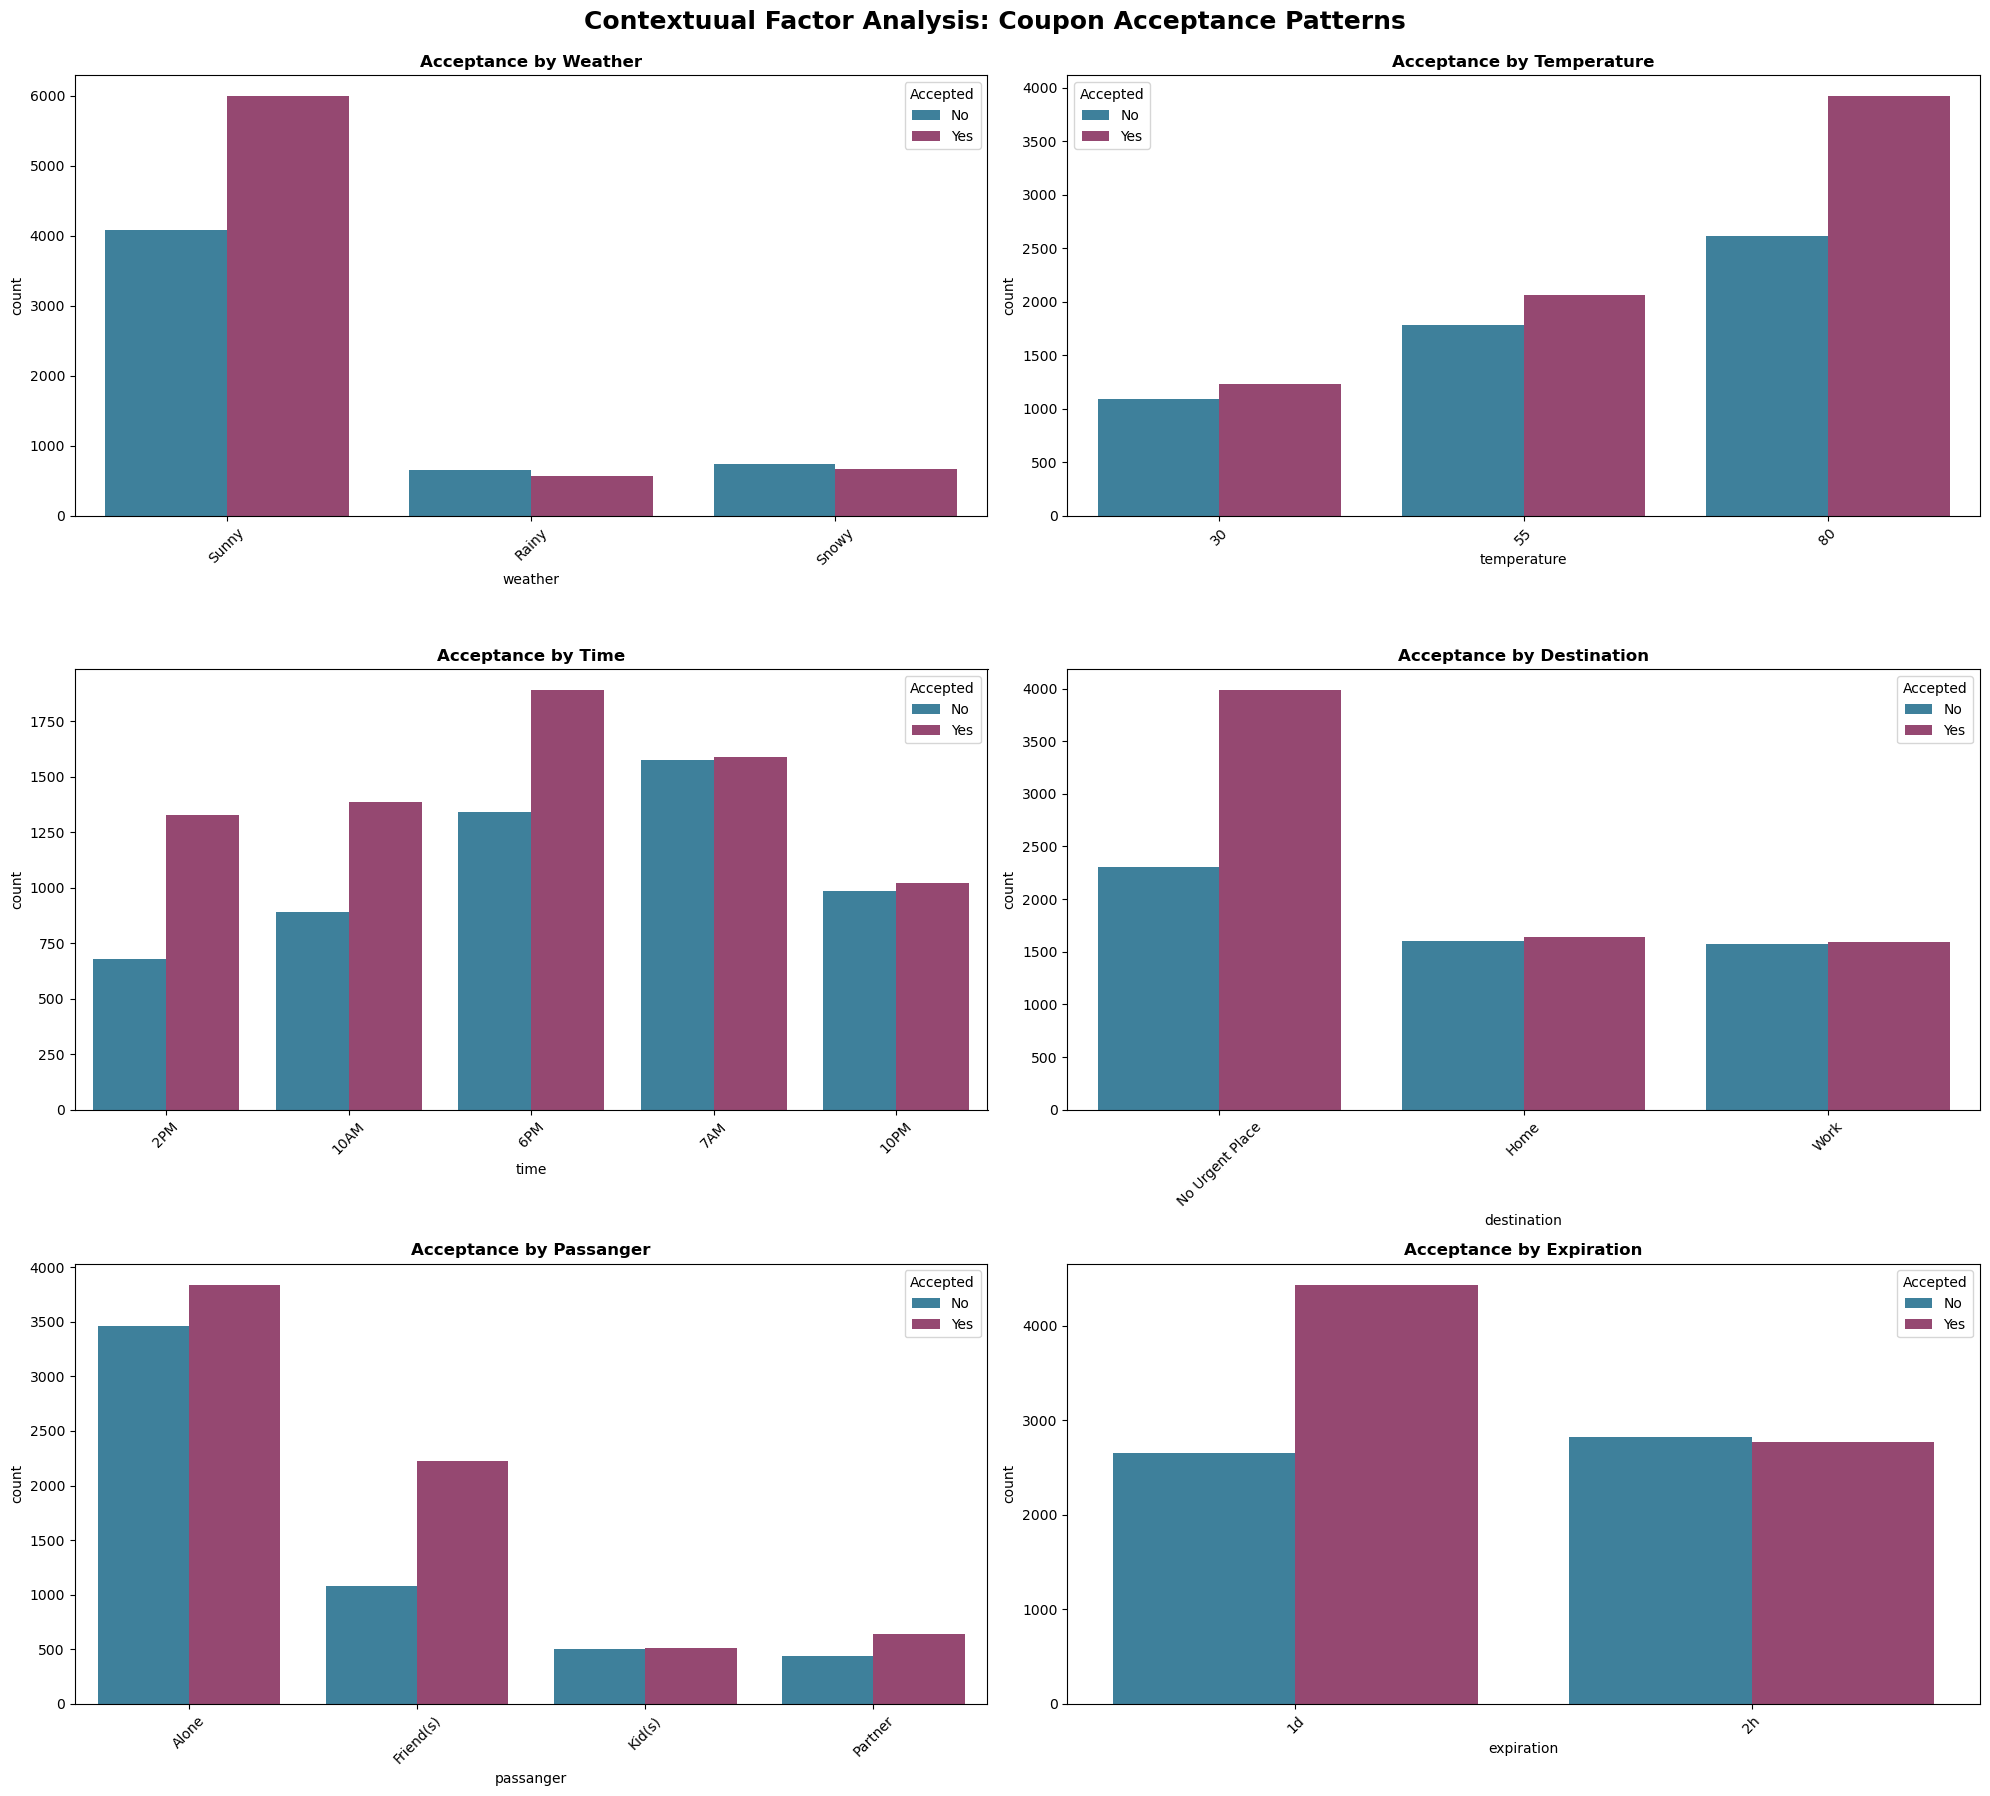

In [157]:
# Analyze contextual variables
contextual_vars = ['weather', 'temperature', 'time', 'destination', 'passanger', 'expiration']

contextual_results = {}
for context in contextual_vars:
    display(f"{context} analysis:")
    result = analyze_demographic(context)
    contextual_results[context] = result
    display(result)

# Visualize contextual factors
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
axes = axes.flatten()

for i, context in enumerate(contextual_vars):
    sns.countplot(data=df, x=context, hue='Y', ax=axes[i])
    axes[i].set_title(f'Acceptance by {context.title()}', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Accepted', labels=['No', 'Yes'])

# Add a main title with higher position to avoid overlap
fig.suptitle('Contextuual Factor Analysis: Coupon Acceptance Patterns', 
             fontsize=18, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

# Behavioral Pattern Analysis

Bar frequency: 


,Total,Accepted,Acceptance_Rate
Bar,,,
4~8,1076,686,0.64
1~3,2473,1538,0.62
gt8,349,201,0.58
less1,3482,1963,0.56
never,5197,2767,0.53


CoffeeHouse frequency: 


,Total,Accepted,Acceptance_Rate
CoffeeHouse,,,
1~3,3225,2109,0.65
4~8,1784,1130,0.63
gt8,1111,648,0.58
less1,3385,1851,0.55
never,2962,1362,0.46


CarryAway frequency: 


,Total,Accepted,Acceptance_Rate
CarryAway,,,
1~3,4672,2712,0.58
4~8,4258,2474,0.58
gt8,1594,914,0.57
never,153,82,0.54
less1,1856,927,0.50


RestaurantLessThan20 frequency: 


,Total,Accepted,Acceptance_Rate
RestaurantLessThan20,,,
gt8,1285,781,0.61
4~8,3580,2093,0.58
1~3,5376,3010,0.56
never,220,118,0.54
less1,2093,1119,0.53


Restaurant20To50 frequency: 


,Total,Accepted,Acceptance_Rate
Restaurant20To50,,,
4~8,728,477,0.66
gt8,264,175,0.66
1~3,3290,1958,0.60
less1,6077,3390,0.56
never,2136,1105,0.52


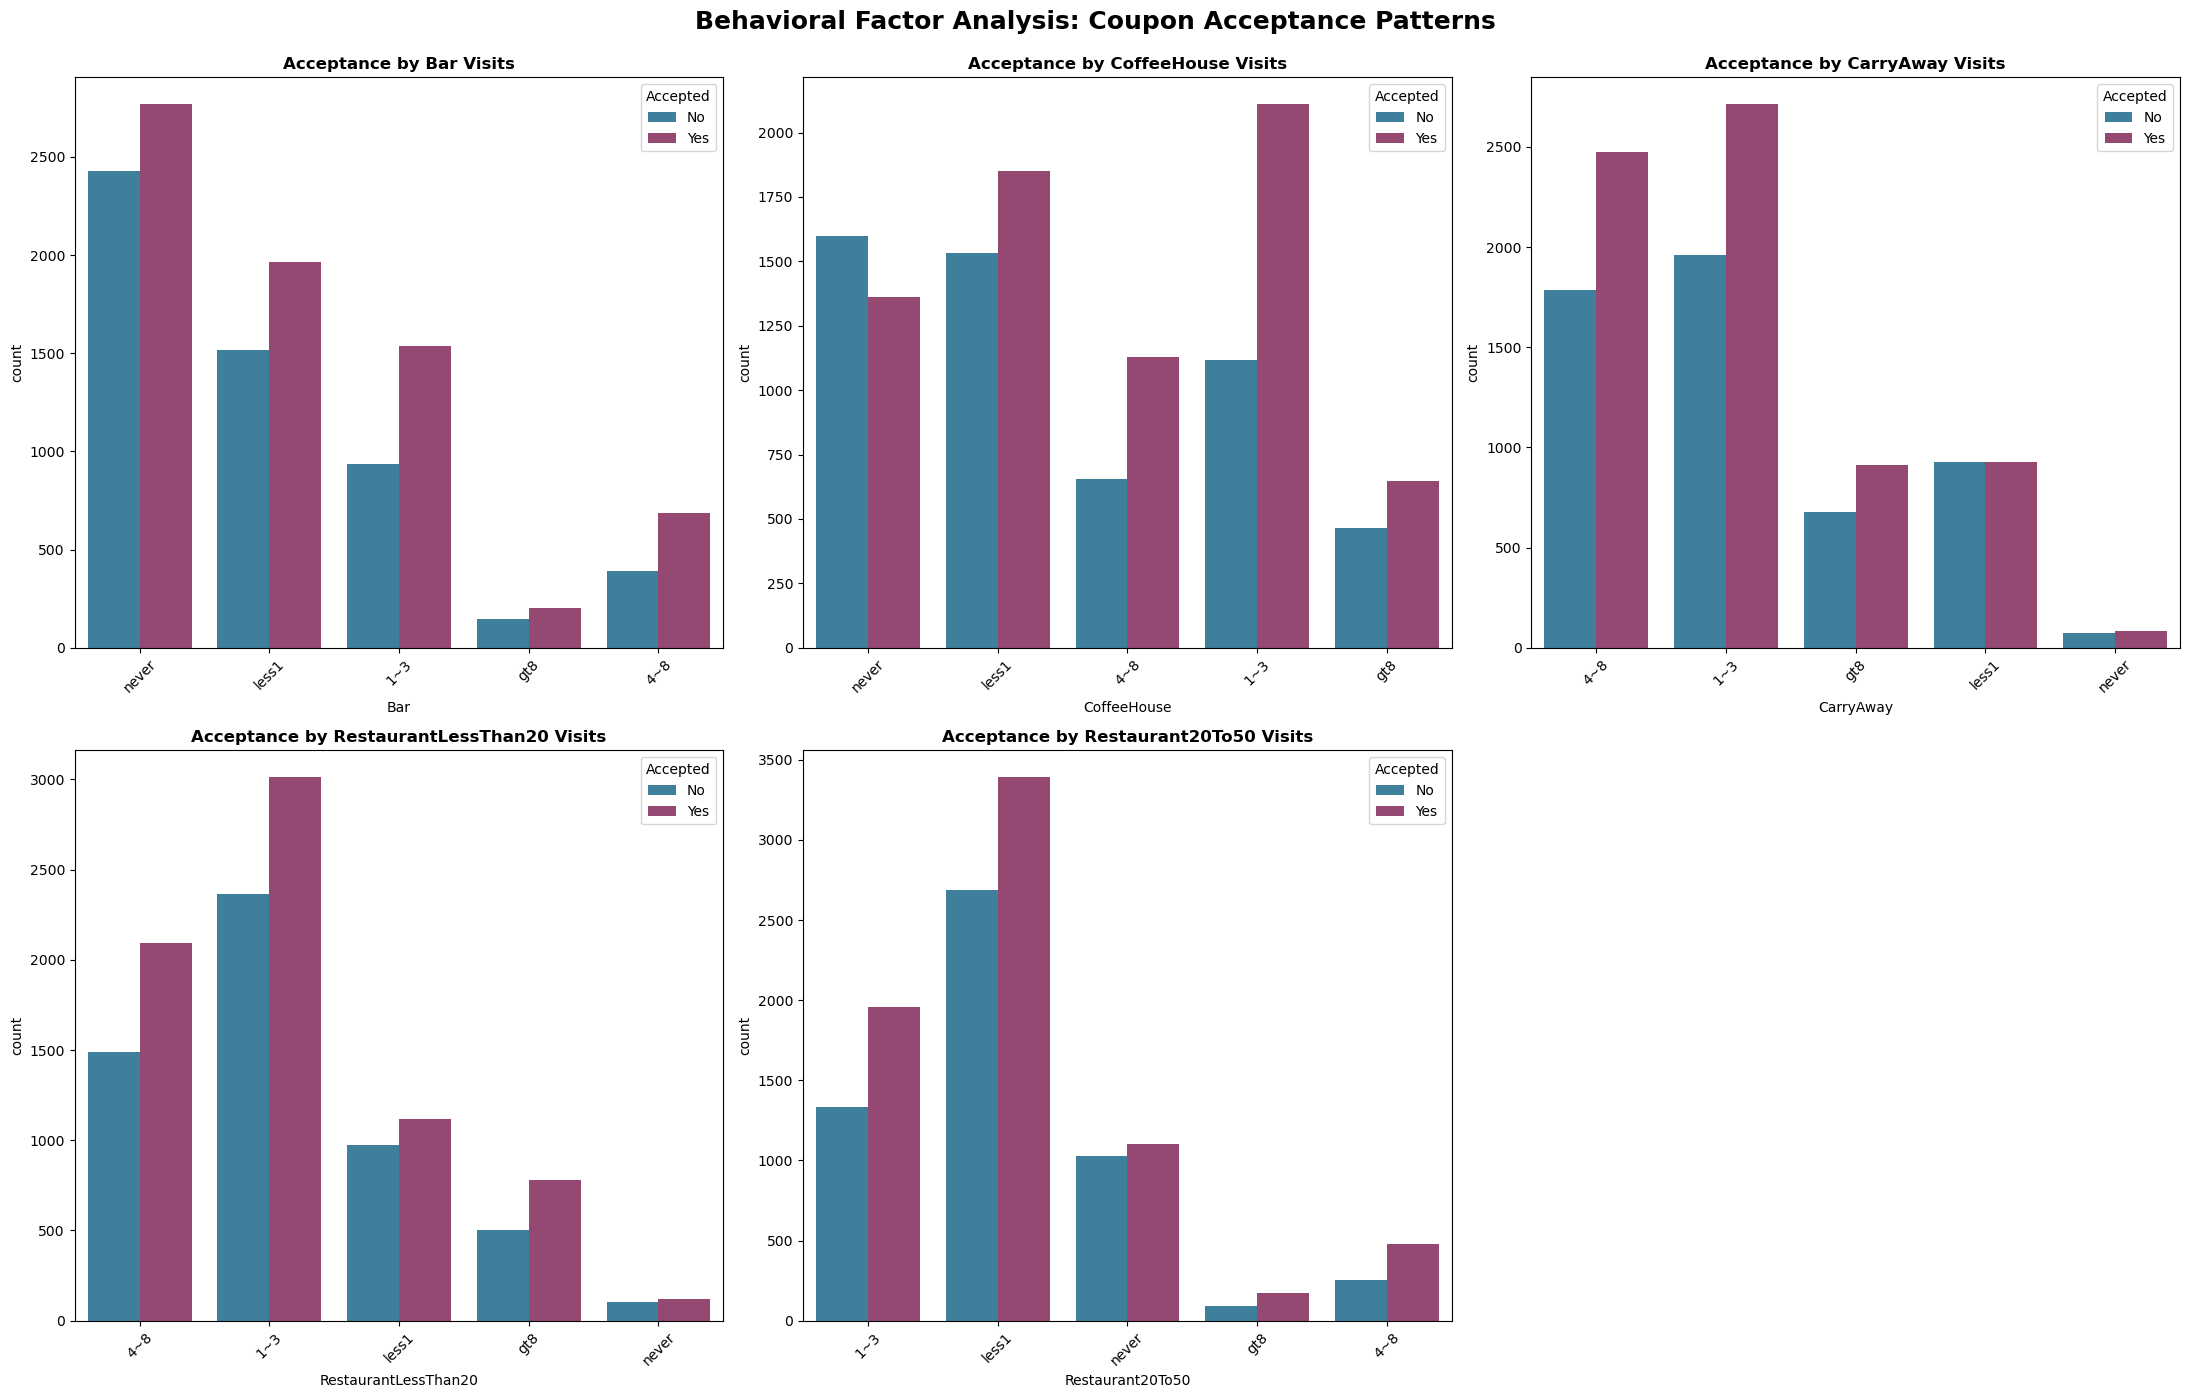

In [158]:
# Analyze venue visit frequency
behavioral_vars = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

behavioral_results = {}
for behavior in behavioral_vars:
    print(f"{behavior} frequency: ")
    result = analyze_demographic(behavior)
    behavioral_results[behavior] = result
    display(result)

# Visualize behavioral patterns
fig, axes = plt.subplots(2, 3, figsize=(22, 14))
axes = axes.flatten()

for i, behavior in enumerate(behavioral_vars):
    sns.countplot(data=df, x=behavior, hue='Y', ax=axes[i])
    axes[i].set_title(f'Acceptance by {behavior} Visits', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Accepted', labels=['No', 'Yes'])

# Remove the empty subplot
axes[5].remove()

# Add a main title with higher position to avoid overlap
fig.suptitle('Behavioral Factor Analysis: Coupon Acceptance Patterns', 
             fontsize=18, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()


# Location & Distance Analysis

Distance Analysis:
toCoupon_GEQ5min


,Total,Accepted,Acceptance_Rate
toCoupon_GEQ5min,,,
1,12684,7210,0.57


toCoupon_GEQ15min


,Total,Accepted,Acceptance_Rate
toCoupon_GEQ15min,,,
0,5562,3416,0.61
1,7122,3794,0.53


toCoupon_GEQ25min


,Total,Accepted,Acceptance_Rate
toCoupon_GEQ25min,,,
0,11173,6562,0.59
1,1511,648,0.43


Direction Analysis:
direction_same


,Total,Accepted,Acceptance_Rate
direction_same,,,
1,2724,1586,0.58
0,9960,5624,0.56


direction_opp


,Total,Accepted,Acceptance_Rate
direction_opp,,,
0,2724,1586,0.58
1,9960,5624,0.56


Distance Category Analysis


,Total,Accepted,Acceptance_Rate
distance_category,,,
Close (5-15min),5562,3416,0.61
Medium (15-25min),5611,3146,0.56
Far (>25min),1511,648,0.43


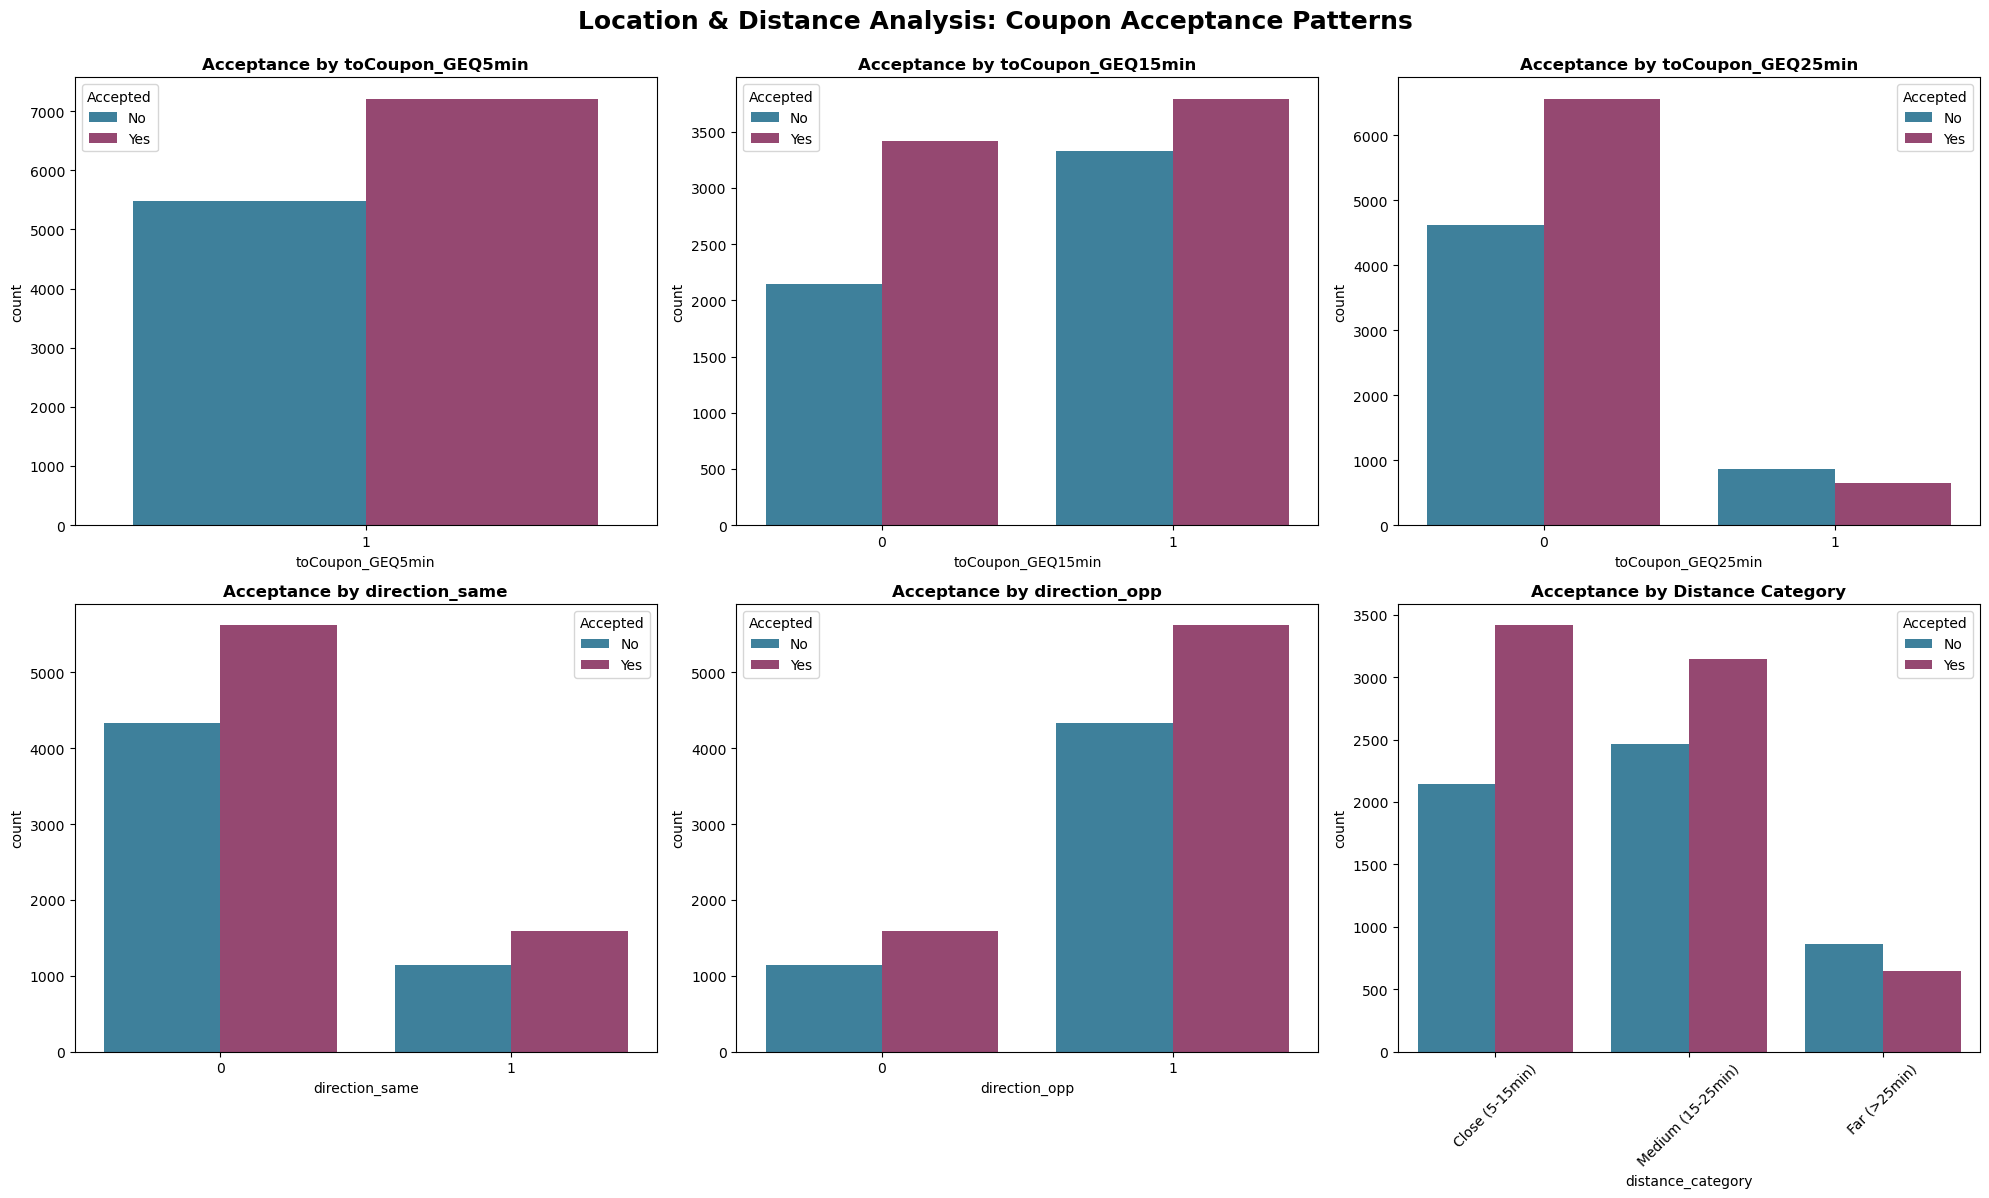

In [159]:
# Analyze distance factors
distance_vars = ['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']
direction_vars = ['direction_same', 'direction_opp']

print("Distance Analysis:")
distance_results = {}
for distance in distance_vars:
    print(f"{distance}")
    result = analyze_demographic(distance)
    distance_results[distance] = result
    display(result)

print("Direction Analysis:")
direction_results = {}
for direction in direction_vars:
    print(f"{direction}")
    result = analyze_demographic(direction)
    direction_results[direction] = result
    display(result)

# Create distance categories for better analysis
df['distance_category'] = 'Very Close (<5min)'
df.loc[df['toCoupon_GEQ5min'] == 1, 'distance_category'] = 'Close (5-15min)'
df.loc[df['toCoupon_GEQ15min'] == 1, 'distance_category'] = 'Medium (15-25min)'
df.loc[df['toCoupon_GEQ25min'] == 1, 'distance_category'] = 'Far (>25min)'

print("Distance Category Analysis")
distance_cat_analysis = analyze_demographic('distance_category')
display(distance_cat_analysis)

# Visualize location factors
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Distance factors
for i, distance in enumerate(distance_vars):
    sns.countplot(data=df, x=distance, hue='Y', ax=axes[0,i])
    axes[0,i].set_title(f'Acceptance by {distance}', fontsize=12, fontweight='bold')
    axes[0,i].legend(title='Accepted', labels=['No', 'Yes'])

# Direction factors
for i, direction in enumerate(direction_vars):
    sns.countplot(data=df, x=direction, hue='Y', ax=axes[1,i])
    axes[1,i].set_title(f'Acceptance by {direction}', fontsize=12, fontweight='bold')
    axes[1,i].legend(title='Accepted', labels=['No', 'Yes'])

# Distance categories
sns.countplot(data=df, x='distance_category', hue='Y', ax=axes[1,2])
axes[1,2].set_title('Acceptance by Distance Category', fontsize=12, fontweight='bold')
axes[1,2].tick_params(axis='x', rotation=45)
axes[1,2].legend(title='Accepted', labels=['No', 'Yes'])

# Add a main title with higher position to avoid overlap
fig.suptitle('Location & Distance Analysis: Coupon Acceptance Patterns', 
             fontsize=18, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

# Restaurant Coupon Analysis

Restaurant coupon records: 4,278
Percentage of total dataset: 33.7%

Restaurant Coupon Performance:


,Total,Accepted,Acceptance_Rate
coupon,,,
Restaurant(20-50),1492,658,0.441
Restaurant(<20),2786,1970,0.707



Restaurant Coupon Demographics:
Restaurant coupons by age 


,Total,Accepted,Acceptance_Rate
age,,,
46,232,153,0.659
26,851,554,0.651
21,867,553,0.638
below21,191,120,0.628
41,381,236,0.619


Restaurant coupons by income 


,Total,Accepted,Acceptance_Rate
income,,,
$50000 - $62499,555,377,0.679
$25000 - $37499,673,452,0.672
$100000 or More,588,374,0.636
Less than $12500,357,213,0.597
$37500 - $49999,607,362,0.596


Restaurant coupons by education 


,Total,Accepted,Acceptance_Rate
education,,,
Some High School,30,20,0.667
Some college - no degree,1465,953,0.651
High School Graduate,297,192,0.646
Bachelors degree,1469,908,0.618
Associates degree,392,221,0.564


Restaurant coupons by time 


,Total,Accepted,Acceptance_Rate
time,,,
2PM,879,665,0.757
6PM,1136,814,0.717
10AM,415,284,0.684
7AM,1002,505,0.504
10PM,846,360,0.426


Restaurant coupons by weather 


,Total,Accepted,Acceptance_Rate
weather,,,
Sunny,3487,2300,0.660
Snowy,556,237,0.426
Rainy,235,91,0.387


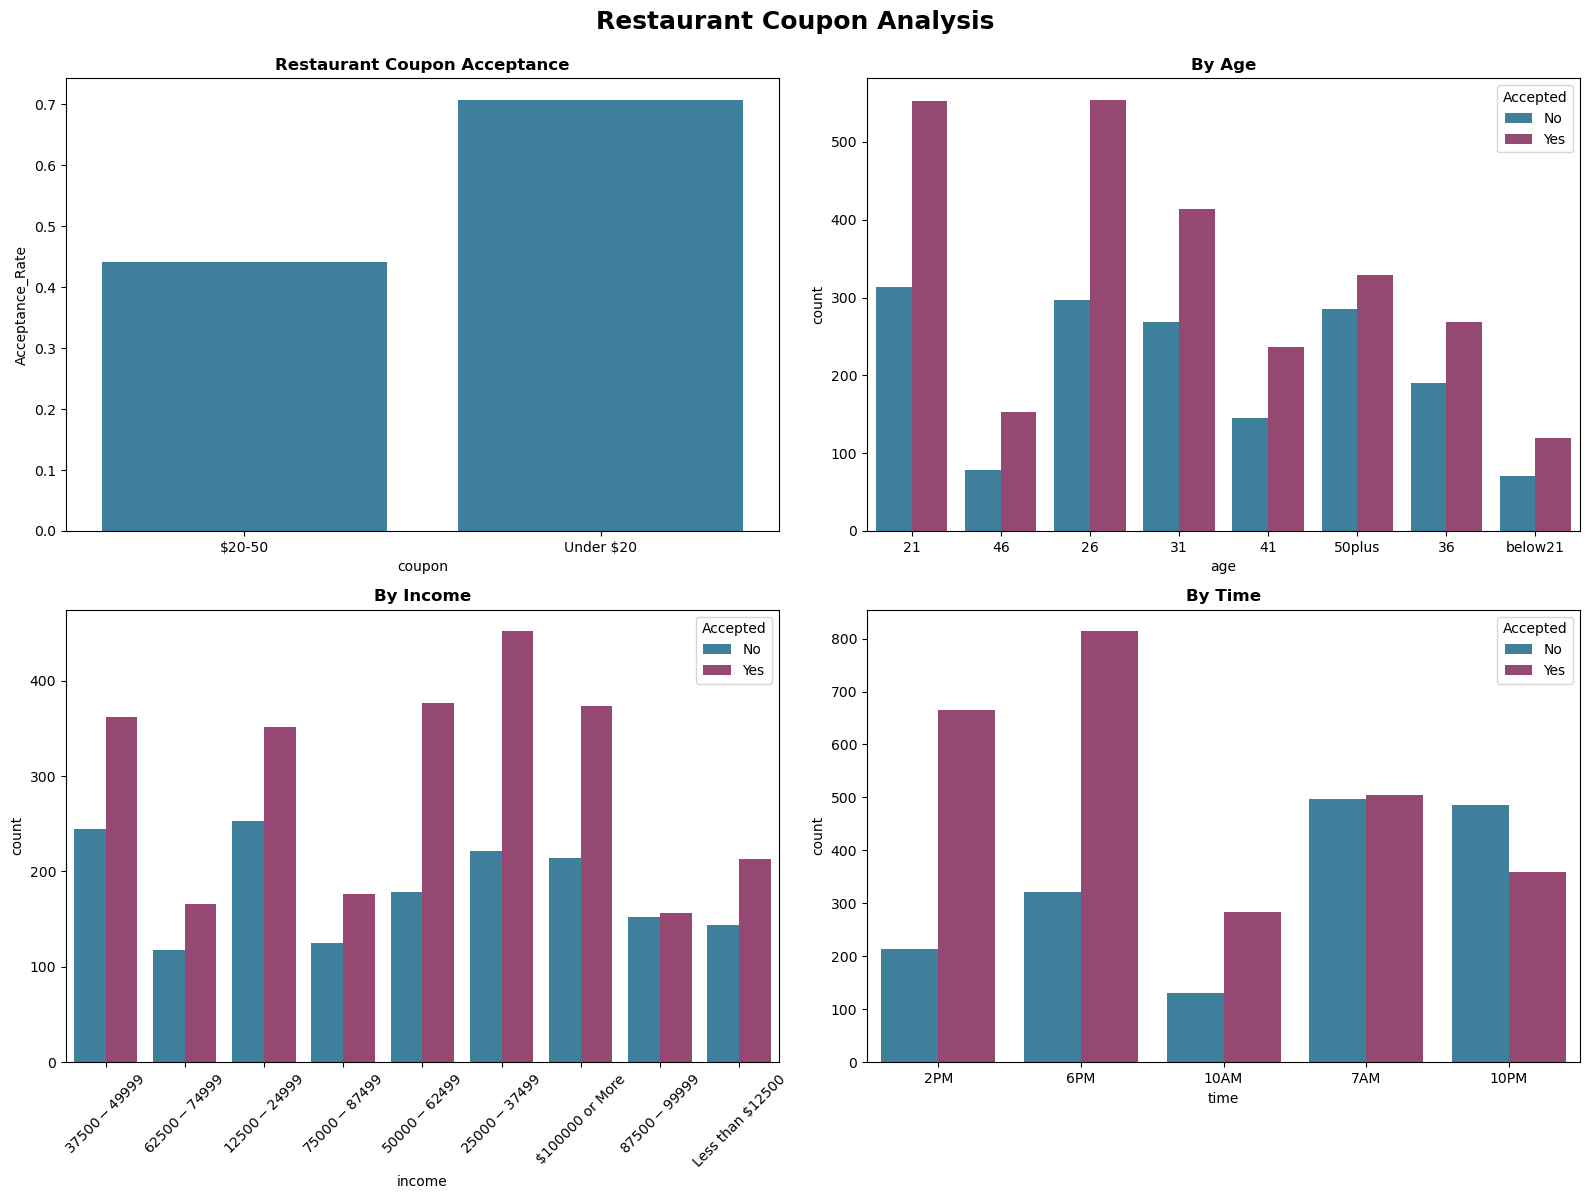

In [160]:
# Filter for restaurant coupons
restaurant_mask = df['coupon'].str.contains('Restaurant', na=False)
restaurant_df = df[restaurant_mask].copy()

print(f"Restaurant coupon records: {len(restaurant_df):,}")
print(f"Percentage of total dataset: {len(restaurant_df)/len(df):.1%}")

# Restaurant coupon performance
restaurant_performance = restaurant_df.groupby('coupon')['Y'].agg(['count', 'sum', 'mean']).round(3)
restaurant_performance.columns = ['Total', 'Accepted', 'Acceptance_Rate']
print("\nRestaurant Coupon Performance:")
display(restaurant_performance)

# Demographics for restaurant coupons
print("\nRestaurant Coupon Demographics:")
restaurant_demographics = ['age', 'income', 'education', 'time', 'weather']

for demo in restaurant_demographics:
    print(f"Restaurant coupons by {demo} ")
    result = restaurant_df.groupby(demo)['Y'].agg(['count', 'sum', 'mean']).round(3)
    result.columns = ['Total', 'Accepted', 'Acceptance_Rate']
    result = result.sort_values('Acceptance_Rate', ascending=False)
    display(result.head())

# Visualize restaurant analysis
# Create simple 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Plot 1: Restaurant coupon types
rest_perf_reset = restaurant_performance.reset_index()
sns.barplot(data=rest_perf_reset, x='coupon', y='Acceptance_Rate', ax=axes[0])
axes[0].set_title('Restaurant Coupon Acceptance', fontweight='bold')
axes[0].set_xticklabels(['$20-50', 'Under $20'])

# Plot 2: By Age
sns.countplot(data=restaurant_df, x='age', hue='Y', ax=axes[1])
axes[1].set_title('By Age', fontweight='bold')
axes[1].legend(['No', 'Yes'], title='Accepted')

# Plot 3: By Income  
sns.countplot(data=restaurant_df, x='income', hue='Y', ax=axes[2])
axes[2].set_title('By Income', fontweight='bold')
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend(['No', 'Yes'], title='Accepted')

# Plot 4: By Time
sns.countplot(data=restaurant_df, x='time', hue='Y', ax=axes[3])
axes[3].set_title('By Time', fontweight='bold')
axes[3].legend(['No', 'Yes'], title='Accepted')

# Add a main title with higher position to avoid overlap
fig.suptitle('Restaurant Coupon Analysis', 
             fontsize=18, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

# Insights and key findings

In [173]:
# Overall stats
total_coupons = len(df)
total_accepted = df['Y'].sum()
overall_rate = df['Y'].mean()

print(f"Overall performance")
print(f"-Total coupons offered: {total_coupons:,}")
print(f"-Total accepted: {total_accepted:,}")
print(f"-Overall acceptance rate: {overall_rate:.1%}")

# Top performing segments
print(f"Top performing segments")

# Best coupon type
best_coupon_type = coupon_stats.index[0]
best_coupon_rate = coupon_stats.iloc[0]['Acceptance_Rate']
print(f"\n coupon type: {best_coupon_type} ({best_coupon_rate:.1%})")

# Best demographics
for demo in ['age', 'income', 'education']:
    best_demo = demographic_results[demo].index[0]
    best_demo_rate = demographic_results[demo].iloc[0]['Acceptance_Rate']
    print(f"\n {demo}: {best_demo} ({best_demo_rate:.1%})")

# Best contextual factors
for context in ['time', 'weather']:
    best_context = contextual_results[context].index[0]
    best_context_rate = contextual_results[context].iloc[0]['Acceptance_Rate']
    print(f"\n {context}: {best_context} ({best_context_rate:.1%})")

# Distance impact
distance_impact = distance_results['toCoupon_GEQ25min'].loc[0, 'Acceptance_Rate'] - distance_results['toCoupon_GEQ25min'].loc[1, 'Acceptance_Rate']
print(f"\n Distance impact: {distance_impact:.1%} higher for closer locations")

worst_coupon_type = coupon_stats.index[-1]
worst_coupon_rate = coupon_stats.iloc[-1]['Acceptance_Rate']
improvement_potential = best_coupon_rate - worst_coupon_rate
print(f"\n Lowest performing coupon: {worst_coupon_type} ({worst_coupon_rate:.1%})")

Overall performance
-Total coupons offered: 12,684
-Total accepted: 7,210
-Overall acceptance rate: 56.8%
Top performing segments

 coupon type: Carry out & Take away (74.0%)

 age: below21 (63.0%)

 income: $50000 - $62499 (60.0%)

 education: Some High School (72.0%)

 time: 2PM (66.0%)

 weather: Sunny (59.0%)

 Distance impact: 16.0% higher for closer locations

 Lowest performing coupon: Bar (41.0%)


# Recommendation and action plan

In [184]:
# Simple recommendations based on analysis
print("Recommendations:")
print(f"- Focus more on {best_coupon_type} coupons - they perform better")
print(f"- Target {demographic_results['age'].index[0]} age group more often")
print(f"- Send offers around {contextual_results['time'].index[0]}")
print(f"- Use {contextual_results['weather'].index[0]} weather for better timing. Note may want to do a deeper dive into which coupons perform best in hot weather vs cold weather")

print(f"Improvement Areas:")
print(f"- {worst_coupon_type} coupons are performing the poorest. Need to ")
print("- Test new messages for rejected offers")
print("- Send offers to people closer to the business")

print("Other ideas:")
print("- Group customers by what they like")
print("- Obtain attitudinal data")
print("- Send weather-based offers automatically") 
print("- Use time of day to personalize")
print("- Track which places people visit most")

# calculate potential impact
current_accepted = df['Y'].sum()
# assume 15% additional
potential_additional = int(current_accepted * 0.15)

print(f"Potential impact:")
print(f"-Could get 15-25% more people to accept offers")
print(f"-That's about {potential_additional:,} more accepted coupons per year")
print(f"-Less money wasted on bad offers")
print(f"-Happier customers getting relevant and more personalizaed deals")

Suggestions:
- Focus more on Carry out & Take away coupons - they perform better
- Target below21 age group more often
- Send offers around 2PM
- Use Sunny weather for better timing. Note may want to do a deeper dive into which coupons perform best in hot weather vs cold weather
Improvement Areas:
- Bar coupons are performing the poorest. Need to 
- Test new messages for rejected offers
- Send offers to people closer to the business
Other ideas:
- Group customers by what they like
- Obtain attitudinal data
- Send weather-based offers automatically
- Use time of day to personalize
- Track which places people visit most
Potential impact:
-Could get 15-25% more people to accept offers
-That's about 1,081 more accepted coupons per year
-Less money wasted on bad offers
-Happier customers getting relevant and more personalizaed deals
